In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from perovskiteml.data.base import BaseDataset, DatasetMetadata
from perovskiteml.data import PerovskiteDatabase

In [2]:
database_path = "../src/perovskiteml/data/clean"
database = PerovskiteDatabase.load(database_path)
database.data

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43247,43623,11,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43248,43624,12,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43249,43625,13,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43250,10974,10974,Gerrit Boschloo,False,10.1039/c8se00450a,Baranwal et al.,2018-10-23,Sustainable Energy & Fuels,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN


In [3]:
processed = database.data.loc[:, [
    "Perovskite_dimension_3D",
    "Perovskite_composition_perovskite_ABC3_structure",
    "Perovskite_composition_short_form",
    "Perovskite_composition_long_form",
    "Perovskite_band_gap"
]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
1,True,True,CsSnBrI,CsSnBr0.3I2.7,NaN
2,True,True,CsSnBrI,CsSnBr1.5I1.5,NaN
3,True,True,CsSnBrI,CsSnBr2.7I0.3,NaN
4,True,True,CsSnBr,CsSnBr3,1.75
...,...,...,...,...,...
43247,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43248,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43249,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43250,True,True,MAPbI,MAPbI3,1.6


In [4]:
processed.dropna(subset=["Perovskite_band_gap"], inplace=True)
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43246,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43247,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43248,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42
43249,False,True,(PEA)FASnI,(PEA)0.08FA0.92SnI3,1.42


In [5]:
processed["Perovskite_band_gap"] = pd.to_numeric(
    processed["Perovskite_band_gap"],
    errors='coerce'
)
processed.dtypes

Perovskite_dimension_3D                                bool
Perovskite_composition_perovskite_ABC3_structure     object
Perovskite_composition_short_form                    object
Perovskite_composition_long_form                     object
Perovskite_band_gap                                 float64
dtype: object

In [6]:
processed.isna().sum()

Perovskite_dimension_3D                              0
Perovskite_composition_perovskite_ABC3_structure    10
Perovskite_composition_short_form                   32
Perovskite_composition_long_form                    32
Perovskite_band_gap                                 16
dtype: int64

In [7]:
processed.dropna(subset=["Perovskite_composition_perovskite_ABC3_structure"], inplace=True)
processed = processed[processed["Perovskite_dimension_3D"]]
processed = processed[processed["Perovskite_composition_perovskite_ABC3_structure"]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43233,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43234,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43235,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43236,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55


In [8]:
multi_layer_count = processed["Perovskite_composition_long_form"].str.contains(r'\|').sum()
print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 102


In [9]:
processed["Perovskite_composition_long_form"] = processed["Perovskite_composition_long_form"].astype(str)

multi_layer_mask = processed["Perovskite_composition_long_form"].str.contains(r'\|')
processed = processed[~multi_layer_mask]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43233,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43234,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43235,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43236,True,True,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55


In [10]:
comp_data = processed.loc[:, ['Perovskite_composition_short_form','Perovskite_composition_long_form', 'Perovskite_band_gap']].copy()
comp_data

,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,CsSnI,CsSnI3,1.27
4,CsSnBr,CsSnBr3,1.75
5,CsSnI,CsSnI3,1.27
6,CsSnBrI,CsSnBrI2,1.37
7,CsSnBrI,CsSnBr2I,1.65
...,...,...,...
43233,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43234,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43235,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55
43236,CsFAPbBrI,Cs0.18FA0.82PbBr0.24I2.82,1.55


In [11]:
def mode(series: pd.Series):
    return series.mode().iloc[0] if not series.mode().empty else None
def mean(series: pd.Series):
    return series.mean()

In [12]:
comp_data = comp_data.groupby("Perovskite_composition_long_form", as_index=False).agg({
    "Perovskite_band_gap": mode,
})
comp_data

,Perovskite_composition_long_form,Perovskite_band_gap
0,(1.3-Pr(NH3)2)0.5Pb1.0I3,1.620
1,(5-AVA)0.05MA0.95PbI3,1.600
2,(6-ACA)0.038MA0.962PbI3,1.590
3,(C6H4NH2)CuBr2I,1.630
4,(C6H4NH2)CuCl2I,2.010
...,...,...
819,MASnI3,1.340
820,PAPbI3,2.320
821,RbPbI3,1.980
822,nan,1.713


In [13]:
# Elements to filter for
elements = ['MA', 'FA','BA', 'Cs', 'Pb', 'Sn', 'I', 'Br']

# Create a regex pattern to match only the specified elements
allowed_elements_pattern = r'^(Cs|MA|FA|Pb|Sn|I|Br|[0-9\.])+(?:[\s]*)*$'

# Filter the DataFrame
elements_mask = comp_data["Perovskite_composition_long_form"].str.contains(allowed_elements_pattern)
comp_filtered = comp_data[elements_mask]
comp_filtered = comp_filtered.reset_index(drop=True)
comp_filtered

C:\Users\Violet\AppData\Local\Temp\ipykernel_14480\1259672710.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  elements_mask = comp_data["Perovskite_composition_long_form"].str.contains(allowed_elements_pattern)


,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.005Pb0.995Br3,2.290
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600
2,Cs0.01MA0.99PbBr0.03I2.97,1.600
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651
...,...,...
643,MASnBr2.64I0.36,1.830
644,MASnBr2I,1.770
645,MASnBr3,2.080
646,MASnBrI2,1.460


In [14]:
comp_filtered.rename(columns={
    'Perovskite_composition_long_form': 'perovskite',
    'Perovskite_band_gap': 'E_g'
}, inplace=True)

# Define regex pattern to extract elements and their fractions
pattern = re.compile(r'(Cs|MA|FA|Pb|Sn|I|Br)(\d*\.\d+|\d*)')

# Function to parse the ABX3 string
def parse_abx3(string):
    matches = pattern.findall(string)
    elements = {}
    for element, fraction in matches:
        # Convert fraction to float, default to 1 if fraction is missing
        fraction = float(fraction) if fraction else 1.0
        elements[element] = fraction
    return elements

parsed_elements = comp_filtered["perovskite"].apply(parse_abx3)
elements_data = pd.json_normalize(parsed_elements)
elements_data.fillna(0, inplace=True)
result_data = comp_filtered.join(elements_data)
result_data

,perovskite,E_g,Cs,Pb,Br,FA,MA,I,Sn
0,Cs0.005Pb0.995Br3,2.290,0.005,0.995,3.000,0.000,0.00,0.000,0.0
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,1.000,0.025,0.390,0.60,2.975,0.0
2,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,1.000,0.030,0.000,0.99,2.970,0.0
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.500,0.000,0.475,0.50,3.000,0.5
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,1.000,0.450,0.825,0.15,2.550,0.0
...,...,...,...,...,...,...,...,...,...
643,MASnBr2.64I0.36,1.830,0.000,0.000,2.640,0.000,1.00,0.360,1.0
644,MASnBr2I,1.770,0.000,0.000,2.000,0.000,1.00,1.000,1.0
645,MASnBr3,2.080,0.000,0.000,3.000,0.000,1.00,0.000,1.0
646,MASnBrI2,1.460,0.000,0.000,1.000,0.000,1.00,2.000,1.0


In [15]:
# Desired column order
desired_order = ['perovskite', 'E_g', 'Cs', 'FA', 'MA', 'Pb', 'Sn', 'I', 'Br']

# Reorder the DataFrame columns
result_data = result_data[desired_order]
result_data
     

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.005Pb0.995Br3,2.290,0.005,0.000,0.00,0.995,0.0,0.000,3.000
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,0.390,0.60,1.000,0.0,2.975,0.025
2,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,0.000,0.99,1.000,0.0,2.970,0.030
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.475,0.50,0.500,0.5,3.000,0.000
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,0.825,0.15,1.000,0.0,2.550,0.450
...,...,...,...,...,...,...,...,...,...
643,MASnBr2.64I0.36,1.830,0.000,0.000,1.00,0.000,1.0,0.360,2.640
644,MASnBr2I,1.770,0.000,0.000,1.00,0.000,1.0,1.000,2.000
645,MASnBr3,2.080,0.000,0.000,1.00,0.000,1.0,0.000,3.000
646,MASnBrI2,1.460,0.000,0.000,1.00,0.000,1.0,2.000,1.000


In [16]:
# Calculate sums for A, B, and X sites
a_site_sums = result_data[["Cs", "FA", "MA"]].sum(axis=1)
b_site_sums = result_data[["Pb", "Sn"]].sum(axis=1)
x_site_sums = result_data[["I", "Br"]].sum(axis=1)

# Count valid and invalid rows
a_site_valid = (a_site_sums == 1).sum()
a_site_invalid = (a_site_sums != 1).sum()
b_site_valid = (b_site_sums == 1).sum()
b_site_invalid = (b_site_sums != 1).sum()
x_site_valid = (x_site_sums == 3).sum()
x_site_invalid = (x_site_sums != 3).sum()

# Print results
print(f"A site valid: {a_site_valid}, invalid: {a_site_invalid}")
print(f"B site valid: {b_site_valid}, invalid: {b_site_invalid}")
print(f"X site valid: {x_site_valid}, invalid: {x_site_invalid}")

A site valid: 589, invalid: 59
B site valid: 627, invalid: 21
X site valid: 563, invalid: 85


In [17]:
invalid_rows = result_data[(a_site_sums != 1) | (b_site_sums != 1) | (x_site_sums != 3)]
invalid_rows

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.005Pb0.995Br3,2.290,0.005,0.00,0.00,0.995,0.00,0.00,3.00
17,Cs0.05FA0.07MA0.25PbI3,1.510,0.050,0.07,0.25,1.000,0.00,3.00,0.00
20,Cs0.05FA0.49MA0.16PbBr0.51I2.49,1.730,0.050,0.49,0.16,1.000,0.00,2.49,0.51
25,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.360,0.050,0.68,0.26,0.750,0.25,2.60,0.40
28,Cs0.05FA0.76MA0.16PbBr0.49I2.51,1.600,0.050,0.76,0.16,1.000,0.00,2.51,0.49
...,...,...,...,...,...,...,...,...,...
614,MAPbBr0.9I,1.720,0.000,0.00,1.00,1.000,0.00,1.00,0.90
617,MAPbBr1.16I1.74,1.900,0.000,0.00,1.00,1.000,0.00,1.74,1.16
618,MAPbBr1.25I75,1.760,0.000,0.00,1.00,1.000,0.00,75.00,1.25
635,MAPbBrI,1.594,0.000,0.00,1.00,1.000,0.00,1.00,1.00


In [18]:

# Calculate sums for A, B, and X sites
a_site_sums = result_data[["Cs", "FA", "MA"]].sum(axis=1)
b_site_sums = result_data[["Pb", "Sn"]].sum(axis=1)
x_site_sums = result_data[["I", "Br"]].sum(axis=1)

# Filter based on ±0.25 tolerance
a_site_valid = ((a_site_sums >= 0.90) & (a_site_sums <= 1.10))
b_site_valid = ((b_site_sums >= 0.90) & (b_site_sums <= 1.10))
x_site_valid = ((x_site_sums >= 2.90) & (x_site_sums <= 3.10))

# Filter dataframe to keep valid rows
valid_rows = result_data[a_site_valid & b_site_valid & x_site_valid]

# Print valid rows
valid_rows.reset_index(drop=True, inplace=True)
print("Valid rows:")
valid_rows

Valid rows:


,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,0.390,0.60,1.0,0.0,2.975,0.025
1,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,0.000,0.99,1.0,0.0,2.970,0.030
2,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.475,0.50,0.5,0.5,3.000,0.000
3,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,0.825,0.15,1.0,0.0,2.550,0.450
4,Cs0.02FA0.38MA0.6PbBr0.025I2.975,1.600,0.020,0.380,0.60,1.0,0.0,2.975,0.025
...,...,...,...,...,...,...,...,...,...
545,MASnBr2.64I0.36,1.830,0.000,0.000,1.00,0.0,1.0,0.360,2.640
546,MASnBr2I,1.770,0.000,0.000,1.00,0.0,1.0,1.000,2.000
547,MASnBr3,2.080,0.000,0.000,1.00,0.0,1.0,0.000,3.000
548,MASnBrI2,1.460,0.000,0.000,1.00,0.0,1.0,2.000,1.000


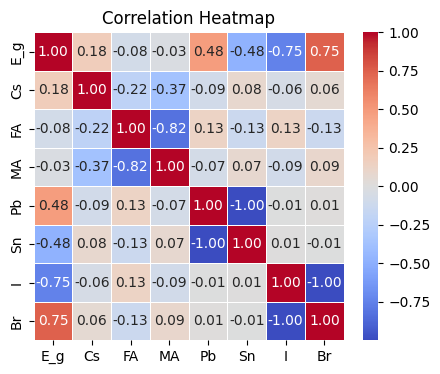

In [28]:
corr_matrix = valid_rows.iloc[:, 1:].corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
result_dataset = BaseDataset(valid_rows.iloc[:, 1:])
result_dataset.save(
    path="../src/perovskiteml/data/processed/element-composition_band-gap.parquet",
    overwrite=True
    )
result_dataset.metadata.model_dump()

{'creation_date': datetime.datetime(2025, 3, 27, 15, 52, 11, 90587),
 'data_hash': 'b172e919445b5b10396dd00e8e3a78804346ae2efc1e2307f0779590f6462da7',
 'source_path': WindowsPath('../src/perovskiteml/data/processed/element-composition_band-gap.parquet'),
 'feature_count': 8,
 'sample_count': 550,
 'target_feature': '',
 'processing_history': [],
 'tags': []}